In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from matplotlib_venn import venn2
from matplotlib_venn import venn3


In [2]:
sample_info = pd.read_csv("/Users/user/Library/CloudStorage/Box-Box/CorSIVs_Project/Corsiv_pheno_all_wave_uni.csv")
meth = pd.read_csv("/Users/user/Library/CloudStorage/Box-Box/CorSIVs_Project/DNHS_CpGs_in_Corsivs_nonadj.csv", index_col=0)
#meth = meth.rename(columns={"V1":"SampleID"})
print(sample_info.head())
print(meth.head())
#sample_info = sample_info.drop(['Unnamed: 0'], axis=1)  # Drop the column "Unnamed: 0" from the dataframe sample_info
sample_info = sample_info.rename(columns={"SampleID":"V1"})
print(sample_info.head())  # Print the first 5 rows of the dataframe sample_info

meth = meth.T  # Transpose the dataframe meth
meth.head()  # Print the first 5 rows of the transposed dataframe meth
# Merge sample_info with methylation data
merged_data = sample_info.merge(meth, left_on='V1', right_index=True)
merged_data = merged_data.rename(columns={"V1":"SampleID"})
print(merged_data.head())  # Print the first 5 rows of the dataframe sample_inf

# Define the categorization functions

def catagorized_age(age):
    if 18 <= age <= 34:
        return 0  # Reference category (young age)
    elif 35 <= age <= 54:
        return 1  # Mid age
    else:
        return 2  # Old age

def catagorized_bmi(BMI):
    if 22 <= BMI <= 27.9:
        return 0  # Reference category (normal BMI)
    elif 28 <= BMI <= 32.9:
        return 1  # Overweight
    else:
        return 2  # Obese

# Apply the categorization functions
merged_data['age_category'] = merged_data['Age'].apply(catagorized_age)
merged_data['bmi_category'] = merged_data['BMI'].apply(catagorized_bmi)

# Create binary variables for age categories
merged_data['mid_age'] = merged_data['age_category'].apply(lambda x: 1 if x == 1 else 0)
merged_data['old_age'] = merged_data['age_category'].apply(lambda x: 1 if x == 2 else 0)

# Create binary variables for BMI categories
merged_data['overweight'] = merged_data['bmi_category'].apply(lambda x: 1 if x == 1 else 0)
merged_data['obese'] = merged_data['bmi_category'].apply(lambda x: 1 if x == 2 else 0)

# Drop the original categorical columns if no longer needed
merged_data.drop(['age_category', 'bmi_category'], axis=1, inplace=True)

# Display the updated DataFrame
print(merged_data.head())

# Define covariates and CpG columns
covariates1 = ['mid_age', 'old_age', 'overweight', 'obese', 'Days_smoking_past_30days','Life_PTS_severity','traumanum', 'female']
covariates2 = ['mid_age', 'old_age', 'overweight', 'obese', 'Days_smoking_past_30days','traumanum','female']
cpg_columns = [col for col in merged_data.columns if col.startswith('cg')]
X_fil = merged_data[covariates1 + cpg_columns]
Y_fil = merged_data[covariates2 + cpg_columns]
# Define target columns
y_cvd = merged_data['CVD']
y_cvd = y_cvd.replace({2: 0, 1: 1})
y_ptsdlife = merged_data['Life_PTS_severity']


# Mean imputation for missing values in CpG columns only
X_fil[cpg_columns] = X_fil[cpg_columns].apply(lambda x: x.fillna(x.mean()), axis=0)
Y_fil[cpg_columns] = Y_fil[cpg_columns].apply(lambda x: x.fillna(x.mean()), axis=0)

# Display the updated DataFrames
print(X_fil.head())
print(Y_fil.head())


   RESP  Sample_Name             SampleID  female  Age      CD8T      CD4T  \
0     1   2011010251  204229100145_R06C01       1   30  0.120055  0.223824   
1     2     23000825  205549610135_R04C01       1   55  0.260751  0.273203   
2     6     23116375  204221240124_R01C01       0   23  0.100060  0.123438   
3    15     23001850  204220340098_R06C01       1   65  0.065487  0.193379   
4    18     23001875  205624870077_R03C01       1   23  0.045181  0.038789   

         NK     Bcell      Mono  ...  w1c1_D16life_8 w1c1_D16life_12  \
0  0.010136  0.084948  0.082143  ...               0               0   
1  0.068143  0.096863  0.093601  ...               0               0   
2  0.039087  0.092493  0.096345  ...               0               0   
3  0.030459  0.034533  0.088005  ...               1               0   
4  0.014512  0.049953  0.061491  ...               0               0   

   w1c1_D16life_13  w1c1_D16life_17  w1c1_D16life_22 w2_CVD  w3_CVD  \
0                0         

/var/folders/z3/mj_cx0y94kz_t96y104_p6dc0000gn/T/ipykernel_19421/4060303549.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_fil[cpg_columns] = X_fil[cpg_columns].apply(lambda x: x.fillna(x.mean()), axis=0)
/var/folders/z3/mj_cx0y94kz_t96y104_p6dc0000gn/T/ipykernel_19421/4060303549.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_fil[cpg_columns] = Y_fil[cpg_columns].apply(lambda x: x.fillna(x.mean()), axis=0)


   mid_age  old_age  overweight  obese  Days_smoking_past_30days  \
0        0        0           0      1                        16   
1        0        1           1      0                         0   
2        0        0           1      0                        10   
3        0        1           0      1                        30   
4        0        0           1      0                        16   

   Life_PTS_severity  traumanum  female  cg00002930  cg00007205  ...  \
0                 55         24       1    0.081486    0.884019  ...   
1                 65         36       1    0.063430    0.858695  ...   
2                 52         12       0    0.057683    0.909719  ...   
3                 27          6       1    0.076098    0.914725  ...   
4                 19          6       1    0.056805    0.898086  ...   

   cg27623060  cg27627803  cg27635394  cg27635653  cg27641240  cg27641532  \
0    0.845860    0.387240    0.070581    0.670187    0.873882    0.227008   
1   

/var/folders/z3/mj_cx0y94kz_t96y104_p6dc0000gn/T/ipykernel_19421/3336881629.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_fil[covariates1] = scaler.fit_transform(X_fil[covariates1])
/var/folders/z3/mj_cx0y94kz_t96y104_p6dc0000gn/T/ipykernel_19421/3336881629.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_fil[covariates2] = scaler.fit_transform(Y_fil[covariates2])


Processing CVD CpG: cg00002930, Shape: (528, 9)
Processing CVD CpG: cg00002930, Shape: (528, 8)
Processing PTSD CpG: cg00002930, Shape: (528, 8)
Processing CVD CpG: cg00007205, Shape: (528, 9)
Processing CVD CpG: cg00007205, Shape: (528, 8)
Processing PTSD CpG: cg00007205, Shape: (528, 8)
Processing CVD CpG: cg00013949, Shape: (528, 9)
Processing CVD CpG: cg00013949, Shape: (528, 8)
Processing PTSD CpG: cg00013949, Shape: (528, 8)
Processing CVD CpG: cg00021264, Shape: (528, 9)
Processing CVD CpG: cg00021264, Shape: (528, 8)
Processing PTSD CpG: cg00021264, Shape: (528, 8)
Processing CVD CpG: cg00023321, Shape: (528, 9)
Processing CVD CpG: cg00023321, Shape: (528, 8)
Processing PTSD CpG: cg00023321, Shape: (528, 8)
Processing CVD CpG: cg00027155, Shape: (528, 9)
Processing CVD CpG: cg00027155, Shape: (528, 8)
Processing PTSD CpG: cg00027155, Shape: (528, 8)
Processing CVD CpG: cg00027586, Shape: (528, 9)
Processing CVD CpG: cg00027586, Shape: (528, 8)
Processing PTSD CpG: cg00027586, S

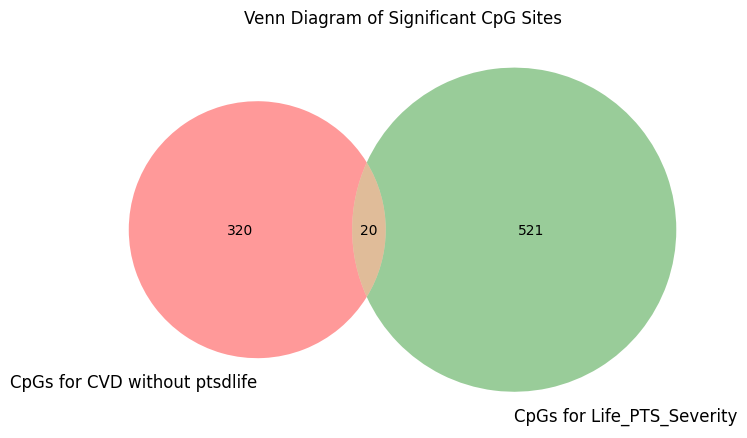

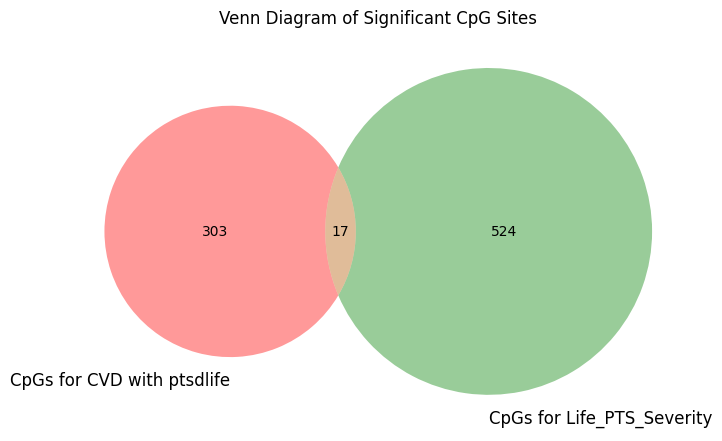

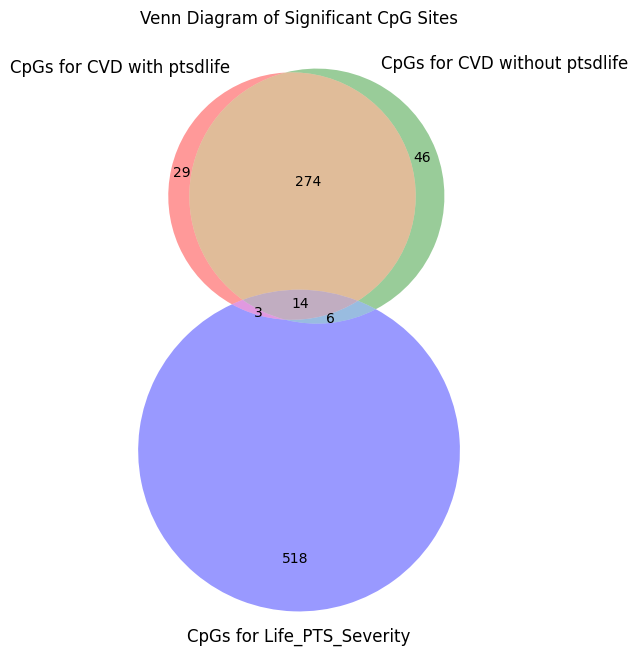

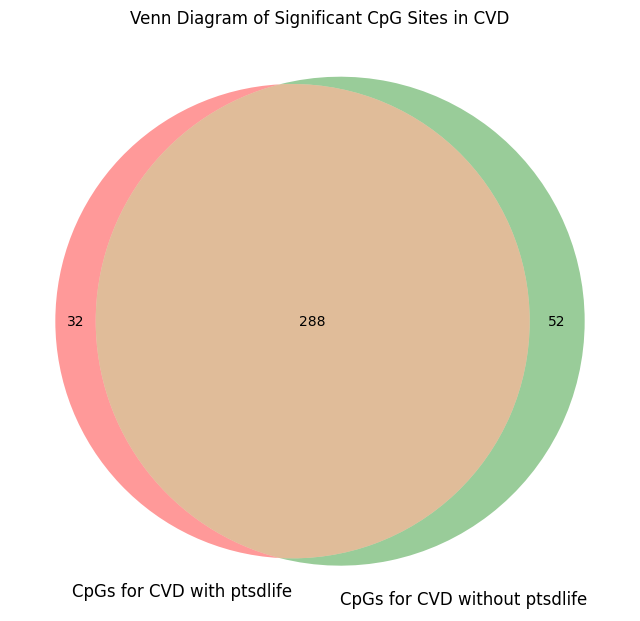

Summaries for the first 16 common significant CpG sites in CVD and PTSD Life Severity:

CpG: cg07941916
CVD Summary:
                           Logit Regression Results                           
Dep. Variable:                    CVD   No. Observations:                  528
Model:                          Logit   Df Residuals:                      518
Method:                           MLE   Df Model:                            9
Date:                Sun, 27 Oct 2024   Pseudo R-squ.:                  0.1180
Time:                        19:40:29   Log-Likelihood:                -287.84
converged:                       True   LL-Null:                       -326.34
Covariance Type:            nonrobust   LLR p-value:                 6.347e-13
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        2.6798      0.497      5.393      0.

/var/folders/z3/mj_cx0y94kz_t96y104_p6dc0000gn/T/ipykernel_19421/3336881629.py:165: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(cpg, (common_cpgs_df['coefficients_cvd'][i], common_cpgs_df['coefficients_ptsdlife'][i]))


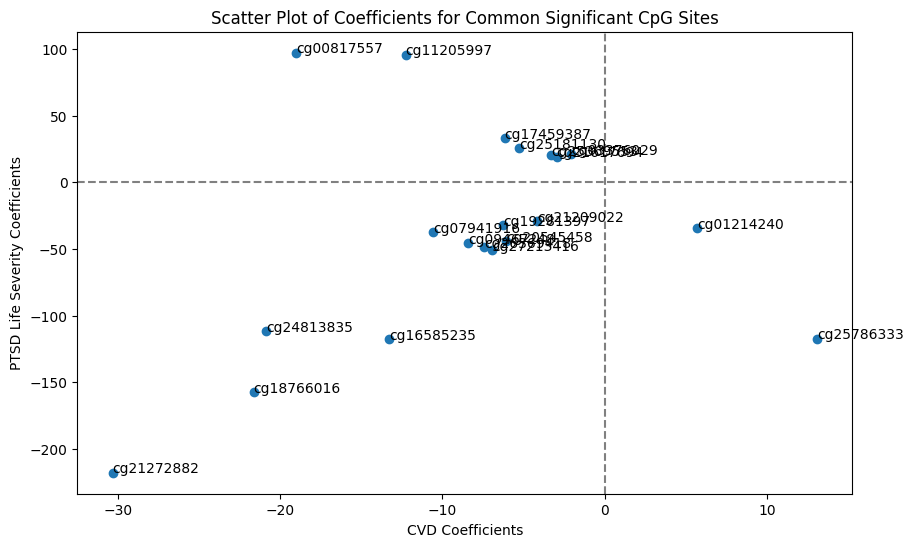

/var/folders/z3/mj_cx0y94kz_t96y104_p6dc0000gn/T/ipykernel_19421/3336881629.py:178: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(cpg, (common_cpgs_df_p['coefficients_cvd'][i], common_cpgs_df_p['coefficients_ptsdlife'][i]))


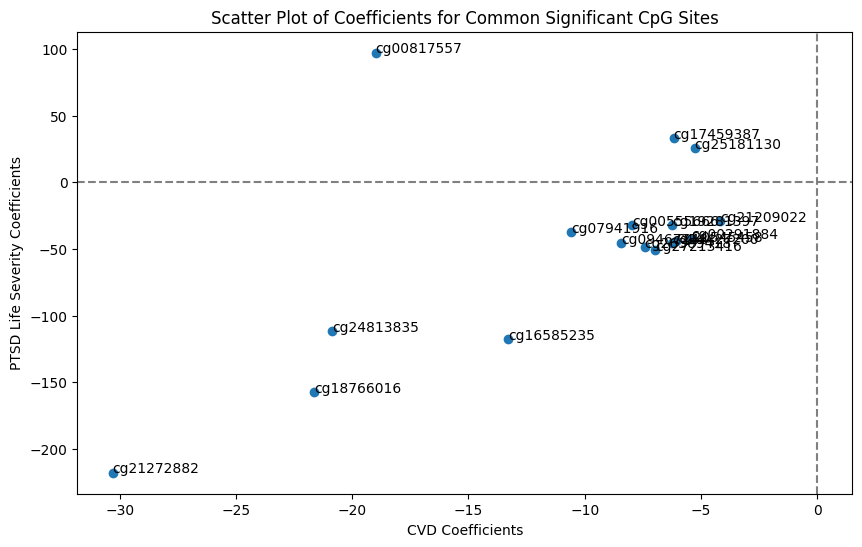

In [6]:
# Normalize the covariates
scaler = StandardScaler()
X_fil[covariates1] = scaler.fit_transform(X_fil[covariates1])
Y_fil[covariates2] = scaler.fit_transform(Y_fil[covariates2])


# Function to fit logistic regression and extract p-values, coefficients, and summary
def get_p_values_logit(X, y):
    X = sm.add_constant(X)  # Add constant term for intercept
    model = sm.Logit(y, X).fit(disp=0)
    return model.pvalues, model.params, model.summary()

# Function to fit linear regression and extract p-values, coefficients, and summary
def get_p_values_ols(X, y):
    X = sm.add_constant(X)  # Add constant term for intercept
    model = sm.OLS(y, X).fit(disp=0)
    return model.pvalues, model.params, model.summary()

# Store p-values, coefficients, and summaries for each CpG site
p_values_cvd = {}
p_values_cvd_p = {}
p_values_ptsdlife = {}
coefficients_cvd = {}
coefficients_cvd_p = {}
coefficients_ptsdlife = {}
summaries_cvd = {}
summaries_cvd_p = {}
summaries_ptsdlife = {}

# Function to check for NaNs or infinite values
def has_nans_or_infs(df):
    return df.isnull().values.any() or np.isinf(df.values).any()

# Process each CpG site for CVD and PTSD Life Severity
for cpg in cpg_columns:
    X_cvd_cpg = X_fil[covariates1].copy()
    X_cvd_cpg[cpg] = X_fil[cpg]
    print(f"Processing CVD CpG: {cpg}, Shape: {X_cvd_cpg.shape}")
    
    if X_cvd_cpg[cpg].nunique() == 1:
        print(f"Warning: {cpg} is constant in CVD data.")
    if has_nans_or_infs(X_cvd_cpg):
        print(f"Warning: {cpg} contains NaNs or infinite values in CVD data.")
        continue  # Skip this CpG site
    
    p_values, coefficients, summary = get_p_values_logit(X_cvd_cpg, y_cvd)
    p_values_cvd[cpg] = p_values[cpg]
    coefficients_cvd[cpg] = coefficients[cpg]
    summaries_cvd[cpg] = summary

    X_cvd_cpg_p = Y_fil[covariates2].copy()
    X_cvd_cpg_p[cpg] = Y_fil[cpg]
    print(f"Processing CVD CpG: {cpg}, Shape: {X_cvd_cpg_p.shape}")
    
    if X_cvd_cpg_p[cpg].nunique() == 1:
        print(f"Warning: {cpg} is constant in CVD data.")
    if has_nans_or_infs(X_cvd_cpg_p):
        print(f"Warning: {cpg} contains NaNs or infinite values in CVD data.")
        continue  # Skip this CpG site
    
    p_values, coefficients, summary = get_p_values_logit(X_cvd_cpg_p, y_cvd)
    p_values_cvd_p[cpg] = p_values[cpg]
    coefficients_cvd_p[cpg] = coefficients[cpg]
    summaries_cvd_p[cpg] = summary
    
    X_ptsdlife_cpg = Y_fil[covariates2].copy()
    X_ptsdlife_cpg[cpg] = Y_fil[cpg]
    print(f"Processing PTSD CpG: {cpg}, Shape: {X_ptsdlife_cpg.shape}")
    
    if X_ptsdlife_cpg[cpg].nunique() == 1:
        print(f"Warning: {cpg} is constant in PTSD data.")
    if has_nans_or_infs(X_ptsdlife_cpg):
        print(f"Warning: {cpg} contains NaNs or infinite values in PTSD data.")
        continue  # Skip this CpG site
    
    p_values, coefficients, summary = get_p_values_ols(X_ptsdlife_cpg, y_ptsdlife)
    p_values_ptsdlife[cpg] = p_values[cpg]
    coefficients_ptsdlife[cpg] = coefficients[cpg]
    summaries_ptsdlife[cpg] = summary

# Merge DataFrames for results
results_combined = pd.DataFrame({
    'p_values_cvd': p_values_cvd,
    'p_values_cvd_p': p_values_cvd_p,
    'p_values_ptsdlife': p_values_ptsdlife,
    'coefficients_cvd': coefficients_cvd,
    'coefficients_cvd_p': coefficients_cvd_p,
    'coefficients_ptsdlife': coefficients_ptsdlife
})

# Define a threshold for significant p-values
p_value_threshold = 0.05

# Identify significant CpG sites for CVD and PTSD Life Severity
significant_cpgs_cvd = [cpg for cpg, p_value in p_values_cvd.items() if p_value < p_value_threshold]
significant_cpgs_cvd_p = [cpg for cpg, p_value in p_values_cvd_p.items() if p_value < p_value_threshold]
significant_cpgs_ptsdlife = [cpg for cpg, p_value in p_values_ptsdlife.items() if p_value < p_value_threshold]

# Print significant CpG sites
print("Significant CpG sites for CVD:", significant_cpgs_cvd)
print("Significant CpG sites for CVD:", significant_cpgs_cvd_p)
print("Significant CpG sites for PTSD Life Severity:", significant_cpgs_ptsdlife)

# Identify common significant CpG sites
significant_cpgs_cvd = set(significant_cpgs_cvd)
significant_cpgs_cvd_p = set(significant_cpgs_cvd_p)
significant_cpgs_ptsdlife = set(significant_cpgs_ptsdlife)
common_significant_cpgs = significant_cpgs_cvd.intersection(significant_cpgs_ptsdlife)
common_significant_cpgs_p = significant_cpgs_cvd_p.intersection(significant_cpgs_ptsdlife)

# Ensure we only take the first 21 common CpG sites if there are more than 21
common_significant_cpgs = list(common_significant_cpgs)
common_significant_cpgs_p = list(common_significant_cpgs_p)

# Create a Venn diagram to show common and unique CpG sites
plt.figure(figsize=(8, 8))
venn2([significant_cpgs_cvd, significant_cpgs_ptsdlife], ('CpGs for CVD without ptsdlife', 'CpGs for Life_PTS_Severity'))
plt.title('Venn Diagram of Significant CpG Sites')
plt.show()
plt.figure(figsize=(8, 8))
venn2([significant_cpgs_cvd_p, significant_cpgs_ptsdlife], ('CpGs for CVD with ptsdlife', 'CpGs for Life_PTS_Severity'))
plt.title('Venn Diagram of Significant CpG Sites')
plt.show()

plt.figure(figsize=(8, 8))
venn3([significant_cpgs_cvd_p,significant_cpgs_cvd, significant_cpgs_ptsdlife], 
      ( 'CpGs for CVD with ptsdlife','CpGs for CVD without ptsdlife', 'CpGs for Life_PTS_Severity'))
plt.title('Venn Diagram of Significant CpG Sites')
plt.show()

plt.figure(figsize=(8, 8))
venn2([significant_cpgs_cvd_p, significant_cpgs_cvd], ('CpGs for CVD with ptsdlife', 'CpGs for CVD without ptsdlife'))
plt.title('Venn Diagram of Significant CpG Sites in CVD')
plt.show()

# Print summaries for the first 16 common significant CpG sites
print("Summaries for the first 16 common significant CpG sites in CVD and PTSD Life Severity:")
for cpg in common_significant_cpgs:
    print(f"\nCpG: {cpg}")
    print("CVD Summary:")
    print(summaries_cvd[cpg])
    print("PTSD Life Severity Summary:")
    print(summaries_ptsdlife[cpg])

# Print summaries for the first 16 common significant CpG sites
print("Summaries for the first 16 common significant CpG sites in CVD and PTSD Life Severity:")
for cpg in common_significant_cpgs_p:
    print(f"\nCpG: {cpg}")
    print("CVD Summary:")
    print(summaries_cvd_p[cpg])
    print("PTSD Life Severity Summary:")
    print(summaries_ptsdlife[cpg])


# Create a scatter plot to visualize the direction of effect
common_cpgs_df = results_combined.loc[common_significant_cpgs]
plt.figure(figsize=(10, 6))
plt.scatter(common_cpgs_df['coefficients_cvd'], common_cpgs_df['coefficients_ptsdlife'])
plt.xlabel('CVD Coefficients')
plt.ylabel('PTSD Life Severity Coefficients')
plt.title('Scatter Plot of Coefficients for Common Significant CpG Sites')
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
for i, cpg in enumerate(common_cpgs_df.index):
    plt.annotate(cpg, (common_cpgs_df['coefficients_cvd'][i], common_cpgs_df['coefficients_ptsdlife'][i]))
plt.show()

# Create a scatter plot to visualize the direction of effect
common_cpgs_df_p = results_combined.loc[common_significant_cpgs_p]
plt.figure(figsize=(10, 6))
plt.scatter(common_cpgs_df_p['coefficients_cvd'], common_cpgs_df_p['coefficients_ptsdlife'])
plt.xlabel('CVD Coefficients')
plt.ylabel('PTSD Life Severity Coefficients')
plt.title('Scatter Plot of Coefficients for Common Significant CpG Sites')
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
for i, cpg in enumerate(common_cpgs_df_p.index):
    plt.annotate(cpg, (common_cpgs_df_p['coefficients_cvd'][i], common_cpgs_df_p['coefficients_ptsdlife'][i]))
plt.show()
